In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('XSSTraining.csv')

# Get the shape of the dataset (number of rows and columns)
print("Dataset Shape: ", df.shape)

# Get the first few rows of the dataset
print("\nDataset Head: \n", df.head())

# Get the summary statistics of the dataset
print("\nDataset Summary Statistics: \n", df.describe())

# Get the data types of each column in the dataset
print("\nDataset Data Types: \n", df.dtypes)

# Check for missing values in the dataset
print("\nMissing Values: \n", df.isnull().sum())

# Check for duplicated rows in the dataset
print("\nNumber of Duplicates: ", df.duplicated().sum())

Dataset Shape:  (19122, 66)

Dataset Head: 
    Contains &lt  ScripTag  Readable  Contains "><  Contains '><  Contains And  \
0             0         1         1             1             0             0   
1             0         1         1             1             0             0   
2             0         1         1             1             0             0   
3             0         1         0             0             0             1   
4             0         1         1             0             0             0   

   Contains Percentage  Contains Slash  Contains BackSlash  Contains Plus  \
0                    0               1                   0              0   
1                    0               1                   0              0   
2                    0               1                   0              0   
3                    1               1                   0              1   
4                    1               1                   0              0   

   ..

In [ ]:
for column in df.columns:
    print(column, ":", df[column].dtype)

Contains &lt : int64
ScripTag : int64
Readable : int64
Contains ">< : int64
Contains '>< : int64
Contains And : int64
Contains Percentage : int64
Contains Slash : int64
Contains BackSlash : int64
Contains Plus : int64
Contains Document : int64
Contains Window : int64
Contains Onload : int64
Contains Onerror : int64
Contains DIV : int64
Contains iframe : int64
Contains img : int64
Contains SRC : int64
Containss Var : int64
Contains Eval : int64
Contains href : int64
Contains Cookie : int64
Contains StringfromCharCode : int64
Contains Single Quote : int64
Contains Question Mark : int64
Contains Exclamation Mark : int64
Contains Semicolon : int64
Contains HTTP : int64
Contains JS : int64
Contains Hash : int64
Contains Equal : int64
Contains Open Bracket : int64
Contains Close Bracket : int64
Contains Duble Bracket : int64
Contains Dollar : int64
Contains Open Parenthesis : int64
Contains Close Parenthesis : int64
Contains Asterisk : int64
Contains Comma : int64
Contains Hyphen : int64
Con

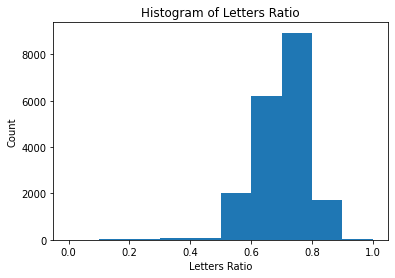

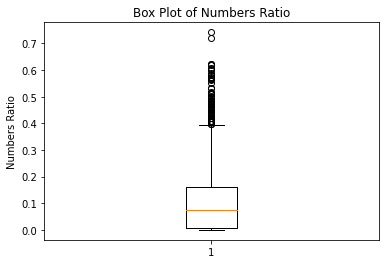

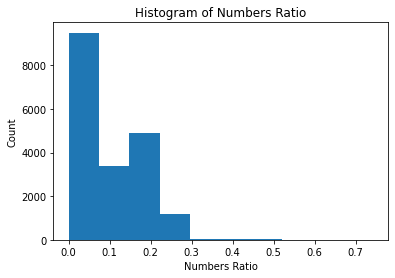

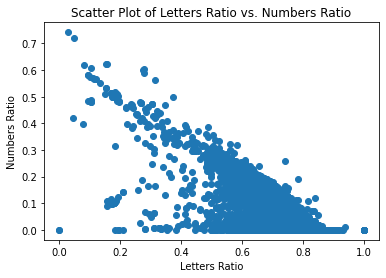

In [ ]:
# Calculate summary statistics
summary_stats = df.describe()

# Plot histogram of a feature
plt.hist(df['Letters Ratio'])
plt.title("Histogram of Letters Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Count")
plt.show()

# Plot box plot of a feature
plt.boxplot(df['Numbuers Ratio'])
plt.title("Box Plot of Numbers Ratio")
plt.ylabel("Numbers Ratio")
plt.show()

# Plot histogram of a feature
plt.hist(df['Numbuers Ratio'])
plt.title("Histogram of Numbers Ratio")
plt.xlabel("Numbers Ratio")
plt.ylabel("Count")
plt.show()

# Plot scatter plot of two features
plt.scatter(df['Letters Ratio'], df['Numbuers Ratio'])
plt.title("Scatter Plot of Letters Ratio vs. Numbers Ratio")
plt.xlabel("Letters Ratio")
plt.ylabel("Numbers Ratio")
plt.show()

/var/folders/7_/43049s_d7v14zv0f3_1ysgqc0000gn/T/ipykernel_1258/1655334447.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()


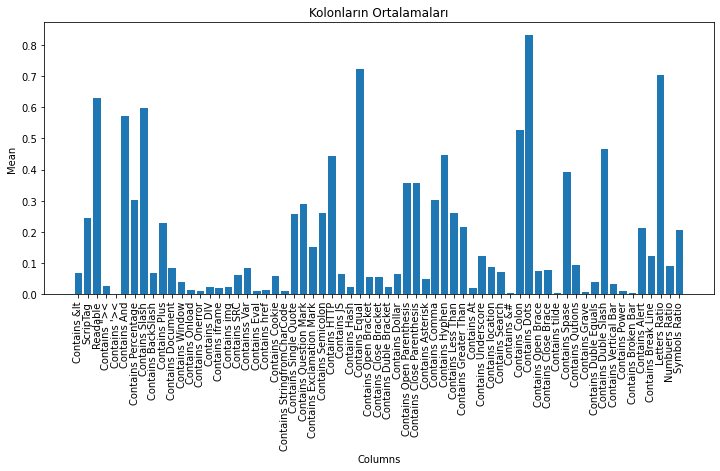

In [ ]:
# calculate the mean of each column
means = df.mean()

# create a bar plot
plt.figure(figsize=(12, 5)) # set the size of the plot
plt.bar(means.index, means.values)
plt.xticks(rotation=90)
plt.title("Kolonların Ortalamaları")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.show()

In [94]:
# create a list to store the column names with outliers
outliers_columns = []

# Select only numerical columns
num_cols = df.select_dtypes(include=["float64"]).columns
print(num_cols)
# Create boxplots for each numerical column
'''for col in num_cols:
    sns.boxplot(x=df[col])'''

# loop through each column in the dataset
for col in num_cols:

    # calculate z-score for each data point in the column
    z = np.abs(stats.zscore(df[col]))

    # find the indices of the data points with z-score greater than 3
    outlier_indices = np.where(z > 3)[0]

    # if there are outliers in the column
    if len(outlier_indices) > 0:
        
        # add the column name to the list of columns with outliers
        outliers_columns.append(col)
        
        # print the number of outliers in the column
        print(f"{col}: {len(outlier_indices)} tane outlier.")

# remove the rows with outliers
df_without_outliers = df.drop(df.index[outlier_indices])

# print the list of columns with outliers
print(f"\nColumns with outliers: {outliers_columns}")

# print the updated shape of the dataset
print(f"\nUpdated shape of the dataset: {df_without_outliers.shape}")

Index(['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio'], dtype='object')
Letters Ratio: 199 tane outlier.
Numbuers Ratio: 89 tane outlier.
Symbols Ratio: 266 tane outlier.

Columns with outliers: ['Letters Ratio', 'Numbuers Ratio', 'Symbols Ratio']

Updated shape of the dataset: (18856, 66)


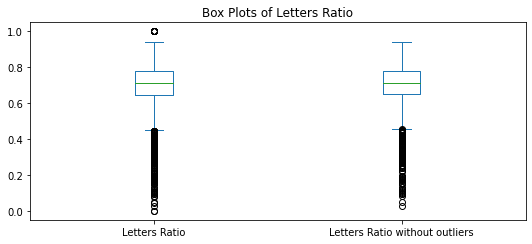

In [ ]:
# Plot box plot of "Letters Ratio" feature
'''plt.boxplot(df['Letters Ratio'])
plt.title("Box Plot of Letters Ratio")
plt.ylabel("Letters Ratio")
plt.show()'''

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Letters Ratio": df['Letters Ratio'], "Letters Ratio without outliers": df_without_outliers['Letters Ratio']})

# Plot the dataframe
ax = data[['Letters Ratio', 'Letters Ratio without outliers']].plot(kind='box', title='Box Plots of Letters Ratio')

# Display the plot
plt.show()

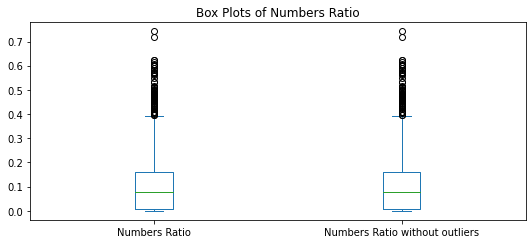

In [ ]:
# Plot box plot of "Numbuers Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Numbers Ratio": df['Numbuers Ratio'], "Numbers Ratio without outliers": df_without_outliers['Numbuers Ratio']})

# Plot the dataframe
ax = data[['Numbers Ratio', 'Numbers Ratio without outliers']].plot(kind='box', title='Box Plots of Numbers Ratio')

# Display the plot
plt.show()

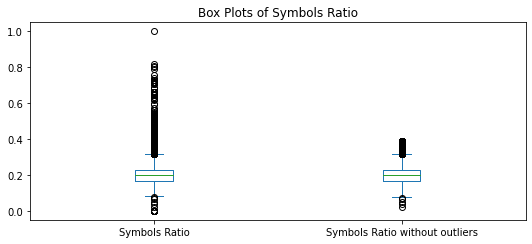

In [ ]:
# Plot box plot of "Symbols Ratio" feature

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Symbols Ratio": df['Symbols Ratio'], "Symbols Ratio without outliers": df_without_outliers['Symbols Ratio']})

# Plot the dataframe
ax = data[['Symbols Ratio', 'Symbols Ratio without outliers']].plot(kind='box', title='Box Plots of Symbols Ratio')

# Display the plot
plt.show()

In [4]:
# Count the missing values in each column
null_columns = df_without_outliers.isna().sum()
print(f"Number of columns with missing values: {len(null_columns[null_columns > 0])}")

Number of columns with missing values: 0


In [5]:
#There is no missing values so I generated missing values randomly.
for num in range(0,4):
    df_without_outliers.iloc[num, num] = np.nan
    
null_columns = df_without_outliers.isna().sum()
print(f"Number of columns with missing values: {len(null_columns[null_columns > 0])}")

Number of columns with missing values: 4


In [6]:
#get the column names that have missing values:
missing_cols = df_without_outliers.columns[df_without_outliers.isnull().any()].tolist()

print("Columns with missing values: ", missing_cols)

Columns with missing values:  ['Contains &lt', 'ScripTag', 'Readable', 'Contains "><']


<Axes: >

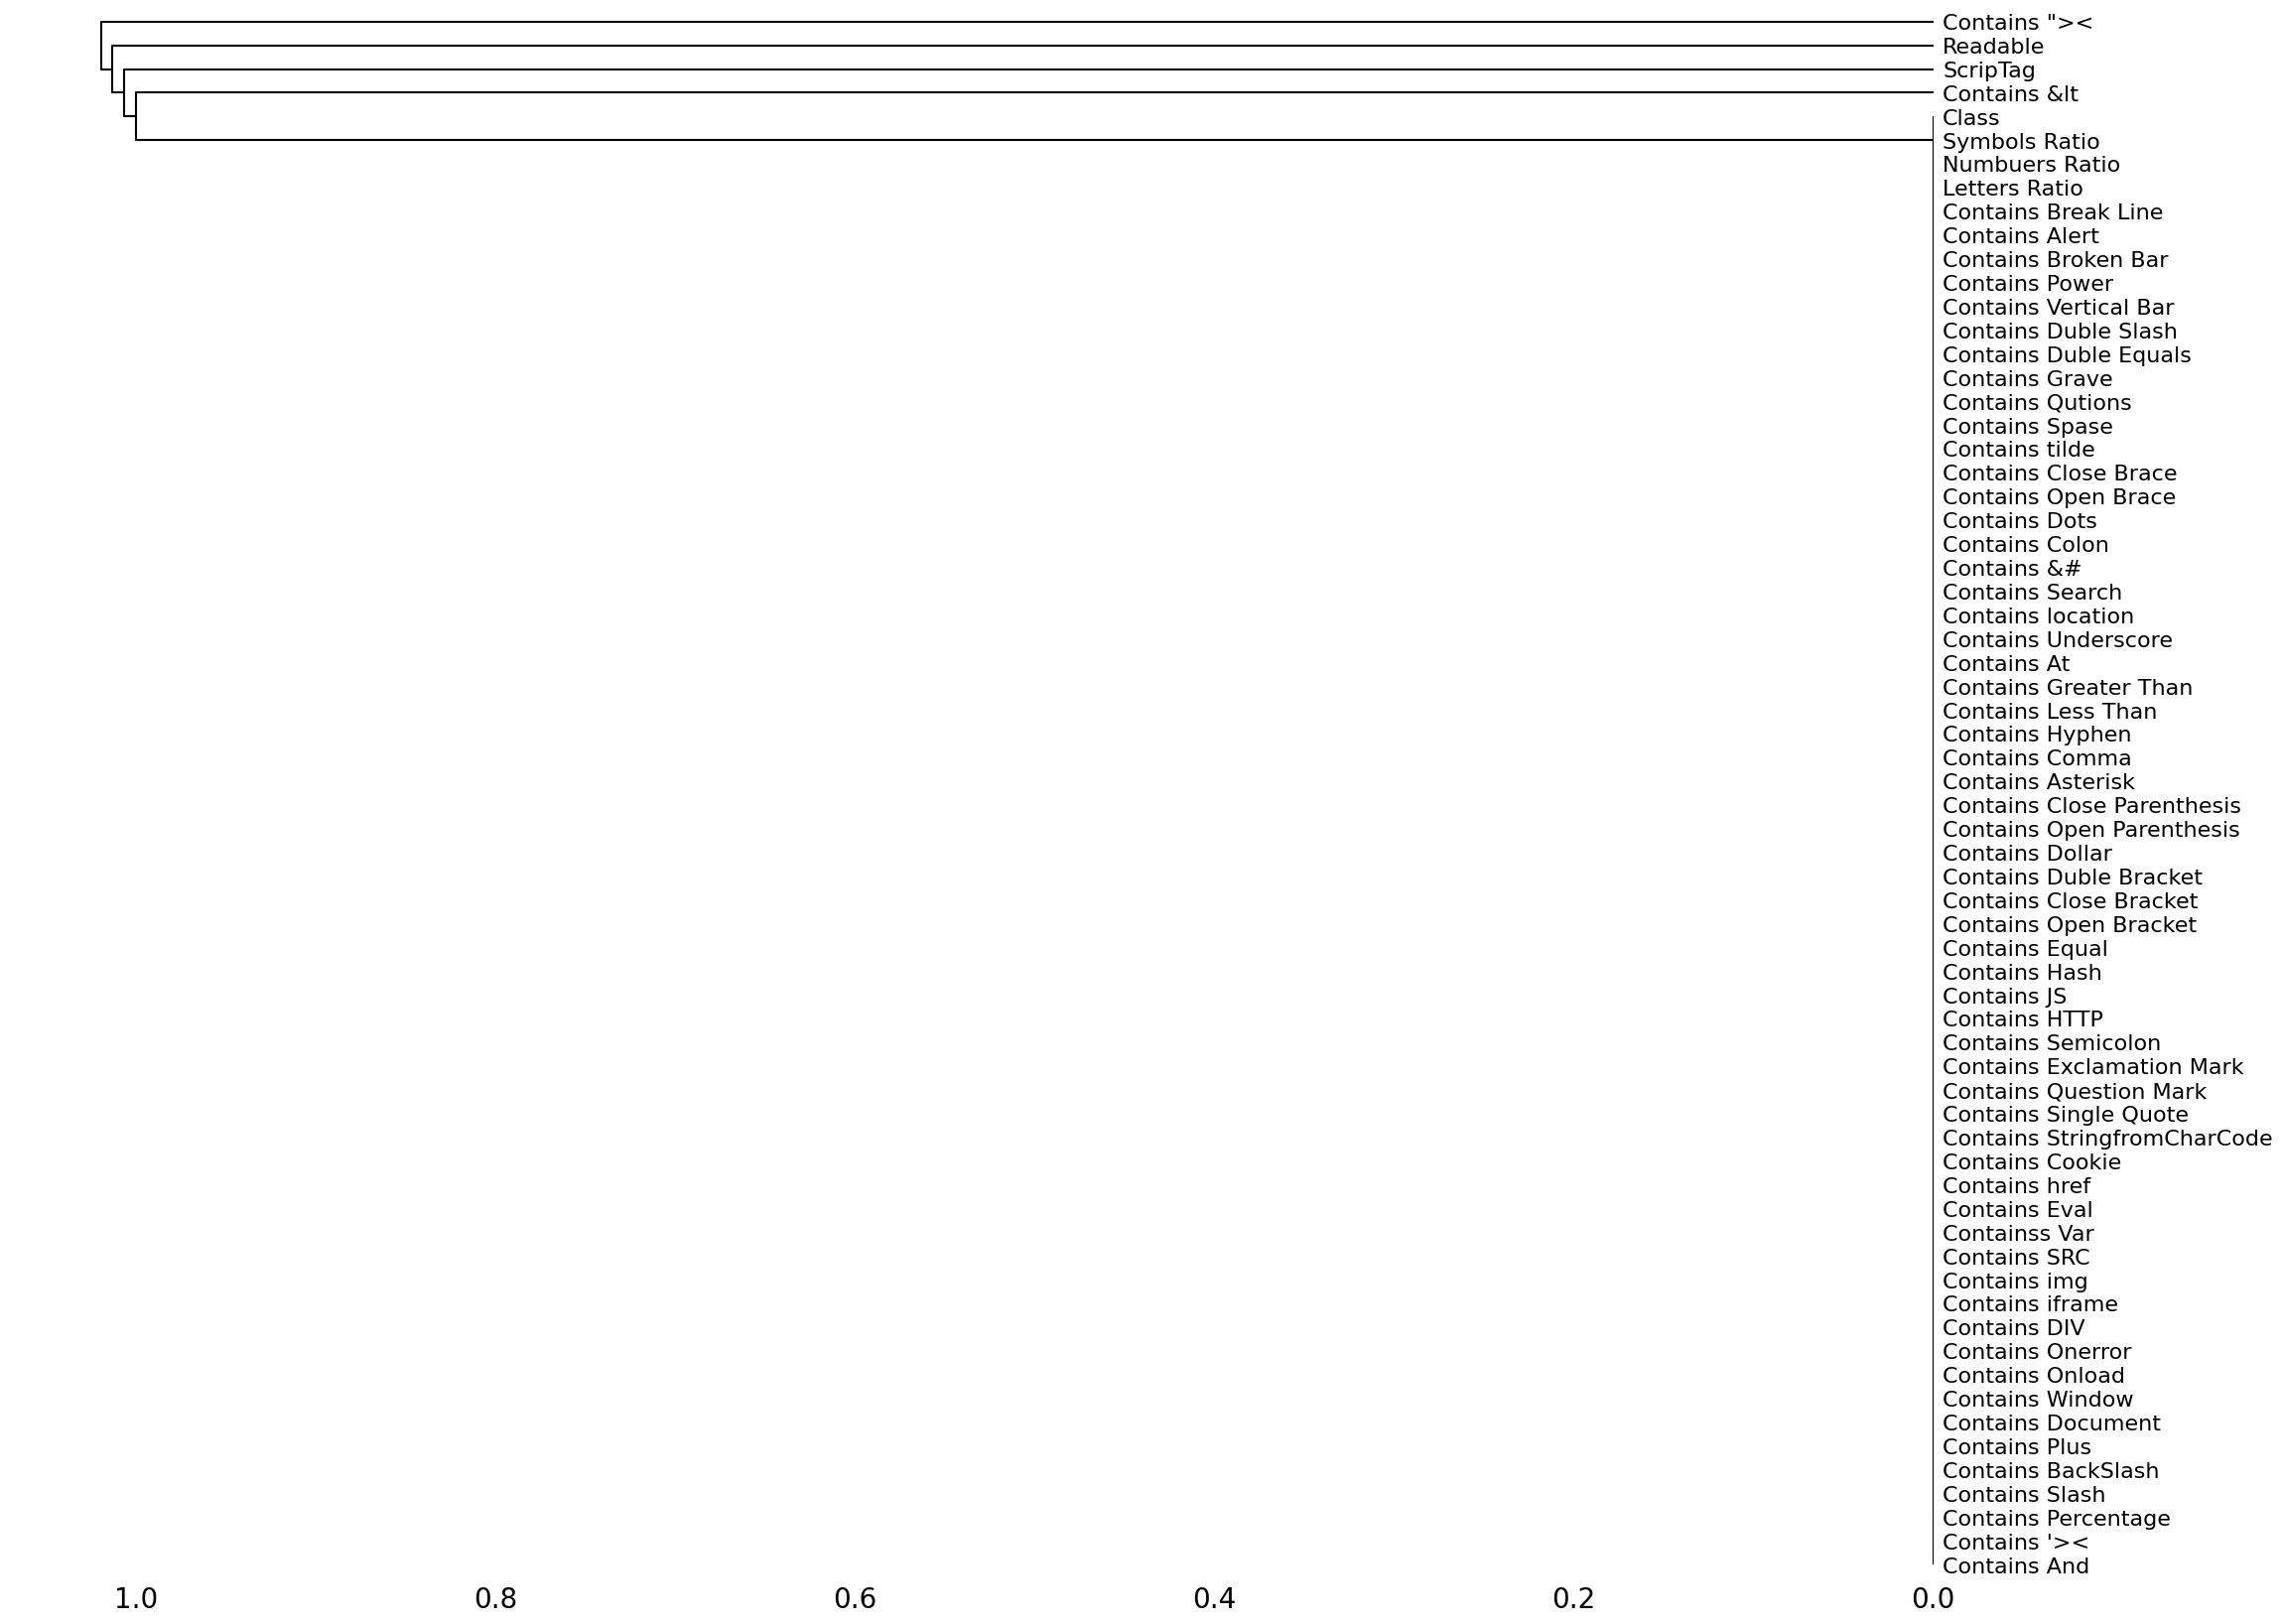

In [7]:
#create a missing value heatmap:
msno.dendrogram(df_without_outliers)

In [8]:
# Count missing values in each column
missing_values_count = df_without_outliers.isna().sum()

# Print the missing values count
print("Missing values count:\n", missing_values_count)

df_without_outliers.dropna(inplace=True)

Missing values count:
 Contains &lt           1
ScripTag               1
Readable               1
Contains "><           1
Contains '><           0
                      ..
Contains Break Line    0
Letters Ratio          0
Numbuers Ratio         0
Symbols Ratio          0
Class                  0
Length: 66, dtype: int64


<ipython-input-9-0162d4c55bcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_without_outliers.corr()


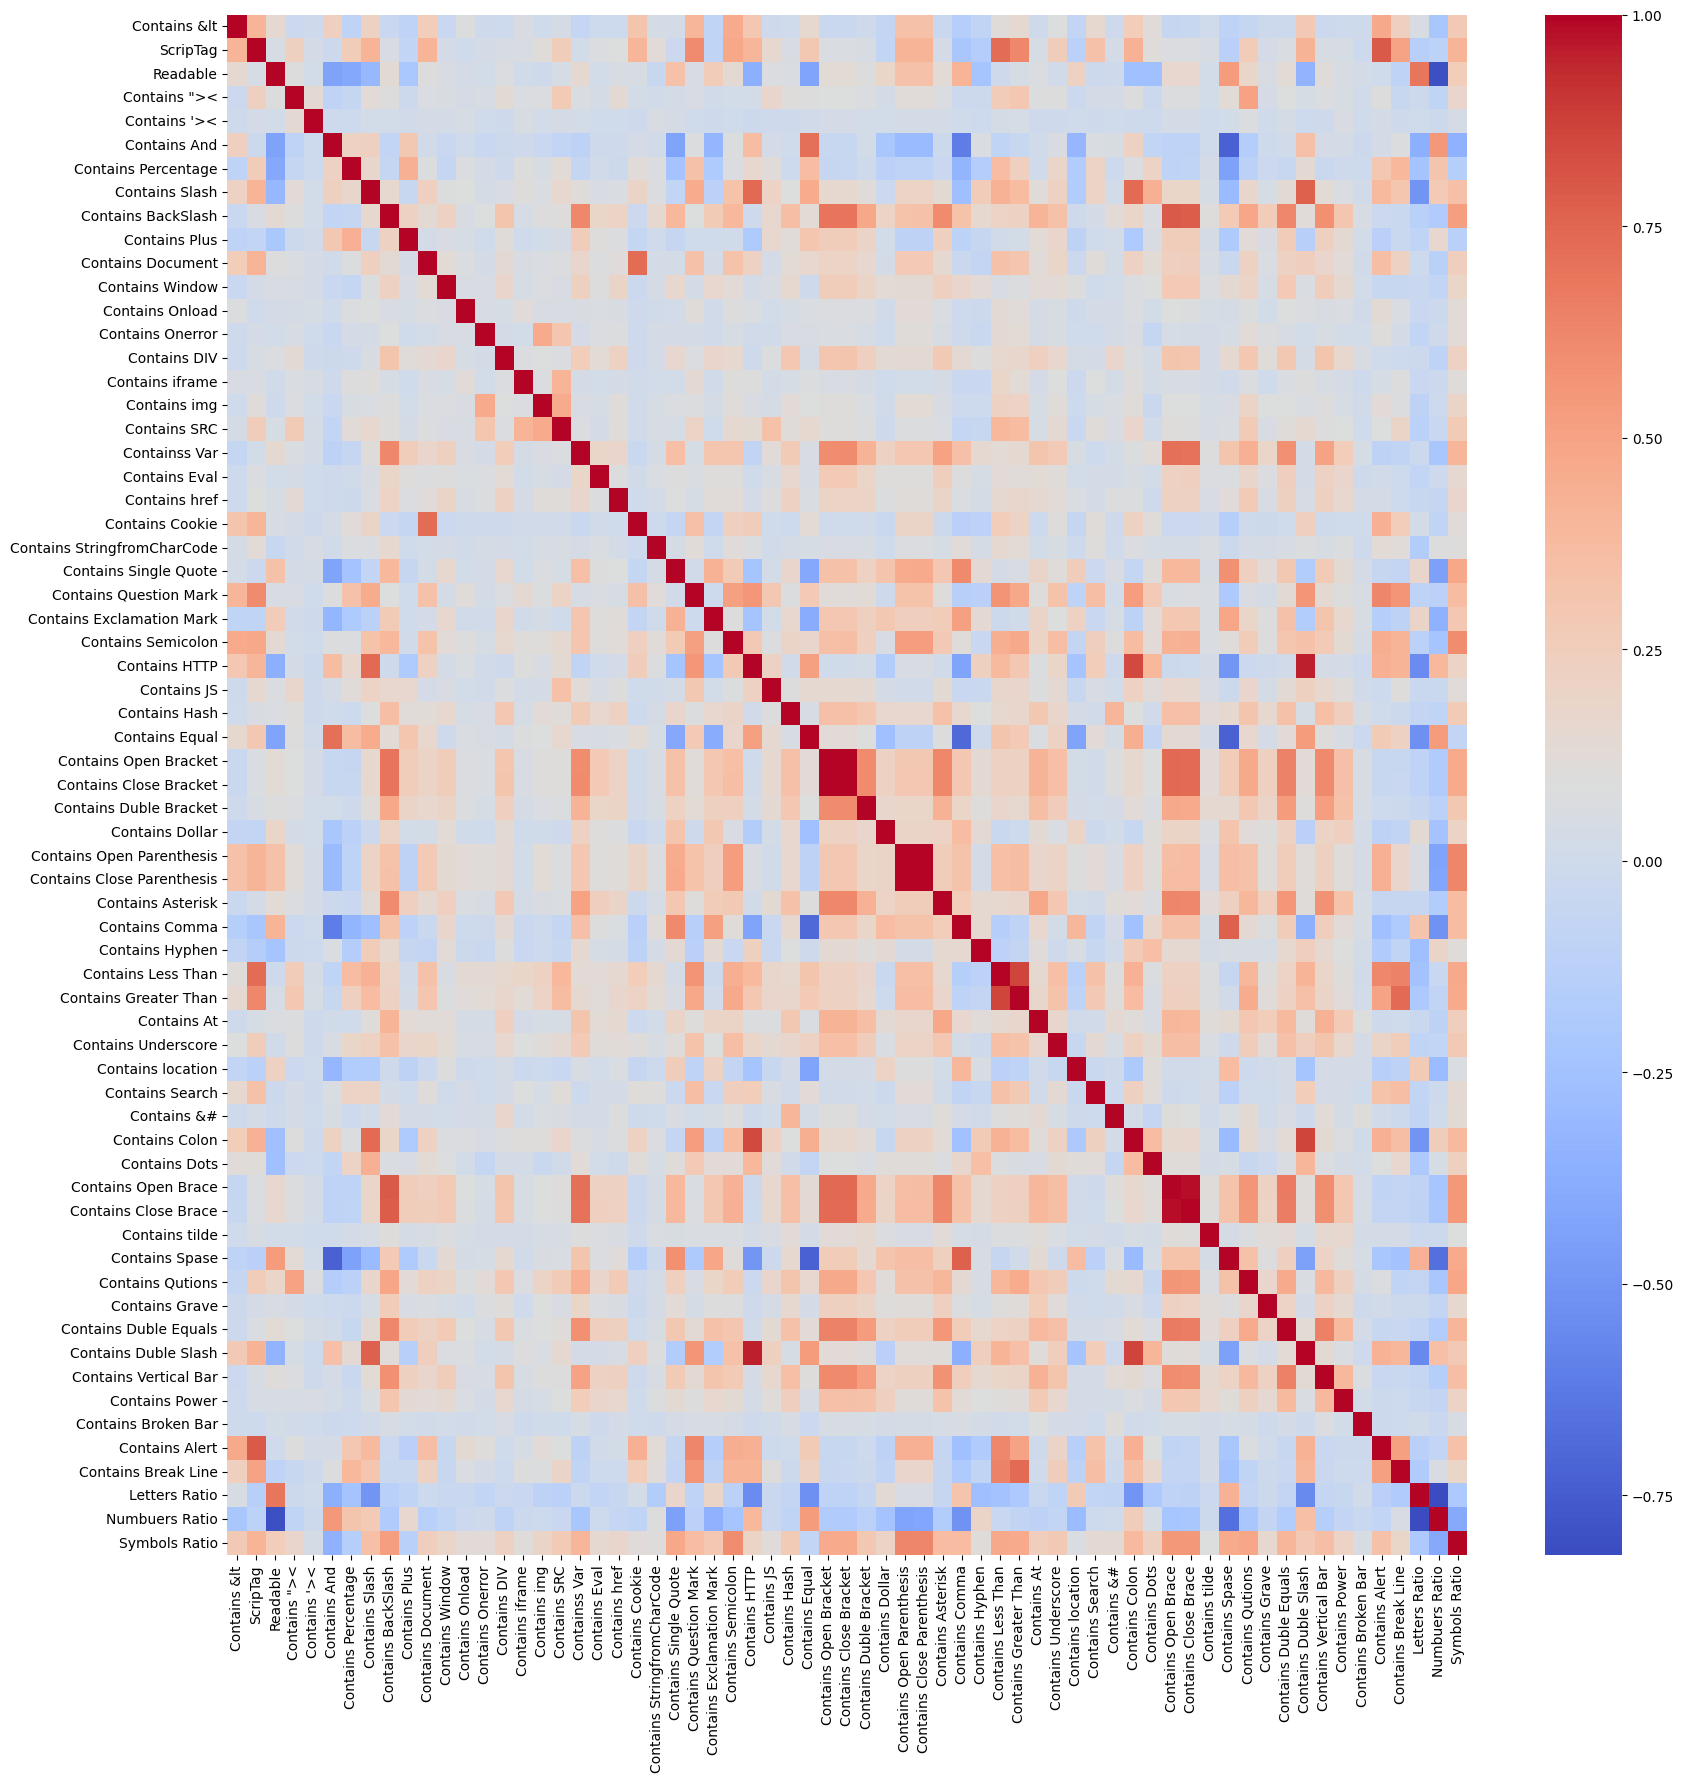

In [9]:
# Create a correlation matrix using the corr() function
corr_matrix = df_without_outliers.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.savefig('corrmatrix.png')

In [111]:
#Feature Engineering Part
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Class'.
df_without_outliers['Class'] = label_encoder.fit_transform(df_without_outliers['Class'])
'''label_mapping = dict(zip(df_without_outliers['class'], df_without_outliers['Class']))
label_mapping'''

"label_mapping = dict(zip(df_without_outliers['class'], df_without_outliers['Class']))\nlabel_mapping"

In [112]:
#Split the dataset into features and target
X = df_without_outliers.drop('Class', axis=1)
y = df_without_outliers['Class']

In [113]:
#Scale
scaler = preprocessing.StandardScaler()
X[["Letters Ratio", "Numbuers Ratio", "Symbols Ratio"]] = scaler.fit_transform(X[["Letters Ratio", "Numbuers Ratio", "Symbols Ratio"]])

In [114]:
#PCA
from sklearn.decomposition import PCA

# Apply PCA to the standardized features
pca = PCA()
principal_components = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"feature{i+1}" for i in range(principal_components.shape[1])]
principal_components = pd.DataFrame(principal_components, columns=component_names)

principal_components.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65
0,-0.711710,1.535900,-1.643888,-0.333056,0.205712,0.192971,0.383417,0.895977,-0.738364,0.824042,...,-0.000938,0.022099,0.000443,0.028991,0.003077,-0.001421,-0.000509,-0.022277,0.001552,0.000825
1,-0.711710,1.535900,-1.643888,-0.333056,0.205712,0.192971,0.383417,0.895977,-0.738364,0.824042,...,-0.000938,0.022099,0.000443,0.028991,0.003077,-0.001421,-0.000509,-0.022277,0.001552,0.000825
2,-0.293928,1.398488,-0.850405,-0.728687,0.459871,0.008938,-0.118789,1.510517,-0.851774,0.229845,...,-0.001979,0.011118,0.014335,0.021463,0.005286,0.001502,-0.006759,-0.025197,0.001931,-0.000694
3,1.212971,0.755865,-1.423550,0.236999,-0.664751,-0.893082,-0.128133,-0.143285,-0.219514,-0.402891,...,-0.267023,0.020243,-0.014290,-0.013467,-0.002465,-0.000494,0.003382,-0.000746,0.000342,-0.000023
4,0.678934,0.374518,-1.628642,-0.303898,0.283907,-0.549614,0.430072,0.063671,-0.276359,0.869358,...,-0.014954,0.020641,-0.004886,0.011087,-0.001488,0.001436,0.004579,0.001543,-0.000231,0.000041


In [115]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [2.98942945e-01 2.40086016e-01 9.16190107e-02 4.95287330e-02
 4.09834356e-02 3.10699741e-02 2.71939527e-02 1.98823252e-02
 1.52582899e-02 1.50414806e-02 1.17832413e-02 9.88897875e-03
 9.17962746e-03 8.98082024e-03 8.32140899e-03 7.78129265e-03
 7.43687939e-03 7.03442988e-03 6.82968852e-03 6.48054705e-03
 5.57470603e-03 5.42732535e-03 5.14800725e-03 4.75402503e-03
 4.49956098e-03 4.39463323e-03 4.20249668e-03 4.11610983e-03
 3.71637005e-03 3.29130468e-03 3.20093531e-03 2.91353298e-03
 2.60500534e-03 2.49409040e-03 2.36059080e-03 2.11940744e-03
 2.03322856e-03 1.86908392e-03 1.78182530e-03 1.69458108e-03
 1.56640141e-03 1.55552194e-03 1.39912383e-03 1.34808002e-03
 1.29625340e-03 1.09427963e-03 1.08406883e-03 1.00507606e-03
 9.87330356e-04 9.52038389e-04 9.06394928e-04 8.89443747e-04
 8.06250578e-04 6.91380314e-04 6.55643977e-04 5.94895996e-04
 5.40080080e-04 4.01482679e-04 2.71226027e-04 1.31196782e-04
 1.21013708e-04 1.11062493e-04 4.9230056

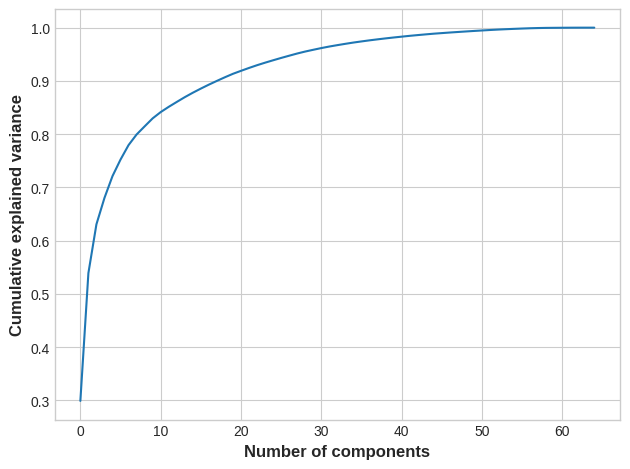

In [116]:
# Get the explained variance ratio for each principal component
variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [128]:
# Apply PCA to the standardized features
pca2 = PCA(n_components=10)
principal_components2 = pca2.fit_transform(X)

# Convert to dataframe
component_names = [f"feature{i+1}" for i in range(principal_components2.shape[1])]
principal_components2 = pd.DataFrame(principal_components2, columns=component_names)
principal_components2.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,-0.711710,1.535900,-1.643891,-0.333094,0.205700,0.192438,0.382995,0.895364,-0.739591,0.811844
1,-0.711710,1.535900,-1.643891,-0.333094,0.205700,0.192438,0.382995,0.895364,-0.739591,0.811844
2,-0.293928,1.398488,-0.850408,-0.728694,0.459936,0.008293,-0.118807,1.508664,-0.843823,0.218408
3,1.212971,0.755865,-1.423551,0.237004,-0.664778,-0.892755,-0.128227,-0.143605,-0.223198,-0.399079
4,0.678934,0.374518,-1.628644,-0.303841,0.283815,-0.549684,0.429589,0.062771,-0.284756,0.863597


<Axes: >

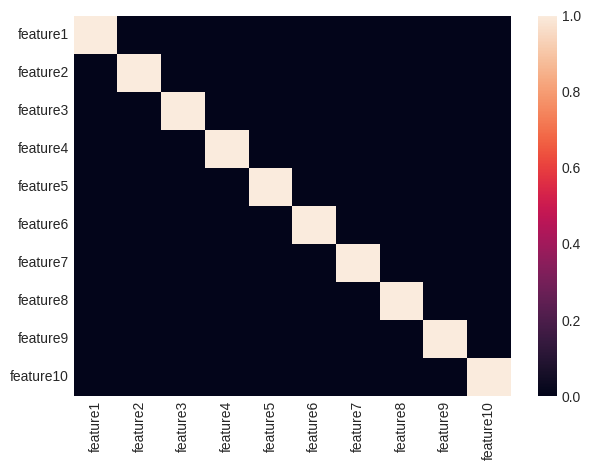

In [129]:
sns.heatmap(principal_components2.corr())

In [130]:
principal_components2.shape

(18856, 10)

In [ ]:
#print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))

'''
# giving a larger plot
plt.figure(figsize =(8, 6))
 
plt.scatter(principal_components2[:, 0], principal_components2[:, 1], c = df_without_outliers['Class'], cmap ='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()'''

In [ ]:
# Train a random forest classifier on the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get the feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the most valuable features
print("Most valuable features:")
# set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# print the dataframe
print(feature_importances)

'''
# Create a new feature and retrain the model
X['new_feature'] = df_without_outliers['ScripTag'] + df_without_outliers['Contains JS']
rf.fit(X, y)

# Get the new feature importances
new_feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the new feature importance
print("\nNew feature importance:")
print(new_feature_importances.loc['new_feature'])'''

Most valuable features:
                             importance
Contains Alert                 0.171391
ScripTag                       0.097597
Contains Less Than             0.097159
Contains Question Mark         0.084488
Contains Greater Than          0.049757
Contains Break Line            0.041303
Contains HTTP                  0.038698
Symbols Ratio                  0.033750
Contains Semicolon             0.030087
Numbuers Ratio                 0.025474
Contains Duble Slash           0.022703
Contains Colon                 0.022600
Contains &lt                   0.022155
Contains Comma                 0.018670
Contains Open Brace            0.016500
Contains Spase                 0.013891
Contains Close Brace           0.013293
Letters Ratio                  0.012602
Contains Percentage            0.012453
Contains JS                    0.012196
Contains Hyphen                0.010780
Contains And                   0.009886
Contains SRC                   0.009517
Contains Qutions

'\n# Create a new feature and retrain the model\nX[\'new_feature\'] = df_without_outliers[\'ScripTag\'] + df_without_outliers[\'Contains JS\']\nrf.fit(X, y)\n\n# Get the new feature importances\nnew_feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=[\'importance\']).sort_values(\'importance\', ascending=False)\n\n# Print the new feature importance\nprint("\nNew feature importance:")\nprint(new_feature_importances.loc[\'new_feature\'])'

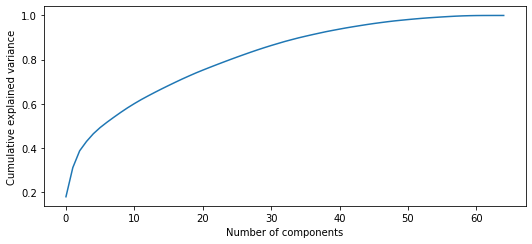